In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import glob

# Fixing the files

In [2]:
# Fixing the files
def convert_file_to_csv(file_path, output_csv_path):
    try:
        # Step 1: Try reading the file content assuming it's a CSV-like structure
        with open(file_path, 'r') as file:
            content = file.read()
        
        # If the file content appears to be well-structured, load it into pandas
        # Assuming it's comma-separated; adjust delimiter if needed (e.g., '\t' for tabs)
        from io import StringIO
        data = StringIO(content)  # Use StringIO to simulate a file-like object for pandas

        # Step 2: Try loading the file as a CSV
        df = pd.read_csv(data)

        # Step 3: Save it as a new CSV file
        df.to_csv(output_csv_path, index=False)
        print(f"File successfully converted to {output_csv_path}")

    except Exception as e:
        print(f"Error converting file: {e}")

# Example usage:
bits = [12,24,32,48]
dataset = ["Cifar","Nus_Wide"]
for x in dataset:
    v = x
    for bit in bits:    
        file_path = fr"c:\Users\frede\Desktop\pr_curves\pr_curves\spectral_{v}_{bit}_pr_curve"
        output_csv_path = fr"C:\Users\frede\Desktop\pr_curves\pr_curves\spectral_{v}_{bit}_pr_curve.csv"    
        convert_file_to_csv(file_path, output_csv_path)

Error converting file: [Errno 2] No such file or directory: 'c:\\Users\\frede\\Desktop\\pr_curves\\pr_curves\\spectral_Cifar_12_pr_curve'
Error converting file: [Errno 2] No such file or directory: 'c:\\Users\\frede\\Desktop\\pr_curves\\pr_curves\\spectral_Cifar_24_pr_curve'
Error converting file: [Errno 2] No such file or directory: 'c:\\Users\\frede\\Desktop\\pr_curves\\pr_curves\\spectral_Cifar_32_pr_curve'
Error converting file: [Errno 2] No such file or directory: 'c:\\Users\\frede\\Desktop\\pr_curves\\pr_curves\\spectral_Cifar_48_pr_curve'
Error converting file: [Errno 2] No such file or directory: 'c:\\Users\\frede\\Desktop\\pr_curves\\pr_curves\\spectral_Nus_Wide_12_pr_curve'
Error converting file: [Errno 2] No such file or directory: 'c:\\Users\\frede\\Desktop\\pr_curves\\pr_curves\\spectral_Nus_Wide_24_pr_curve'
Error converting file: [Errno 2] No such file or directory: 'c:\\Users\\frede\\Desktop\\pr_curves\\pr_curves\\spectral_Nus_Wide_32_pr_curve'
Error converting file: [E

# Doing PR Curve

In [3]:
# Directory containing the CSV files
folder_path = r"C:\Users\frede\Desktop\pr_curves\pr_curves"

dataframes = {}

file_pattern = os.path.join(folder_path, "*48*.csv")

for filepath in glob.glob(file_pattern):
    filename = os.path.basename(filepath).replace(".csv", "")
    first_two_words = "_".join(filename.split("_")[:2])
    df = pd.read_csv(filepath,index_col=0)
    df = df.iloc[1:]
    dataframes[first_two_words] = df
    globals()[first_two_words] = df

for name, df in dataframes.items():
    print(f"Variable {name} created.")

Variable dpsh_Cifar created.
Variable dpsh_imagenet created.
Variable dpsh_Nus created.
Variable dsh_Cifar created.
Variable dsh_imagenet created.
Variable dsh_Nus created.
Variable dtsh_Cifar created.
Variable dtsh_imagenet created.
Variable spectral_Cifar created.
Variable spectral_Nus created.
Variable subic_Cifar created.
Variable subic_imagenet created.
Variable subic_Nus created.


# Plots

In [4]:
dpsh_imagenet.columns

Index(['precision', 'recall'], dtype='object')

In [5]:
dsh_imagenet.columns

Index(['precision', 'recall'], dtype='object')

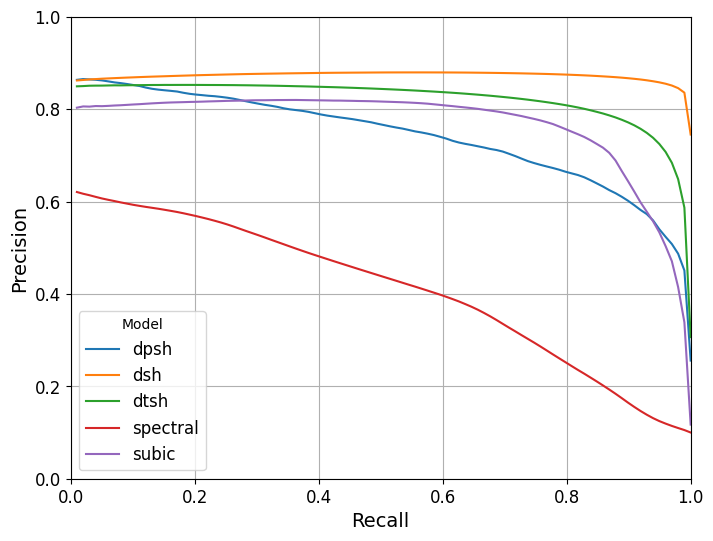

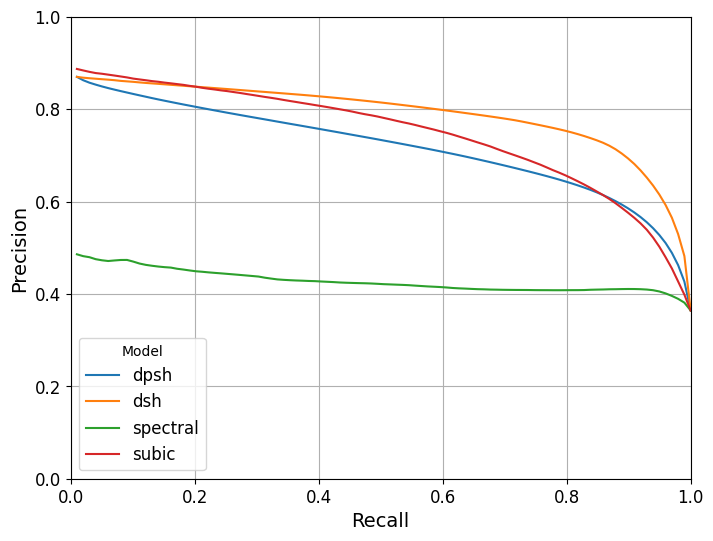

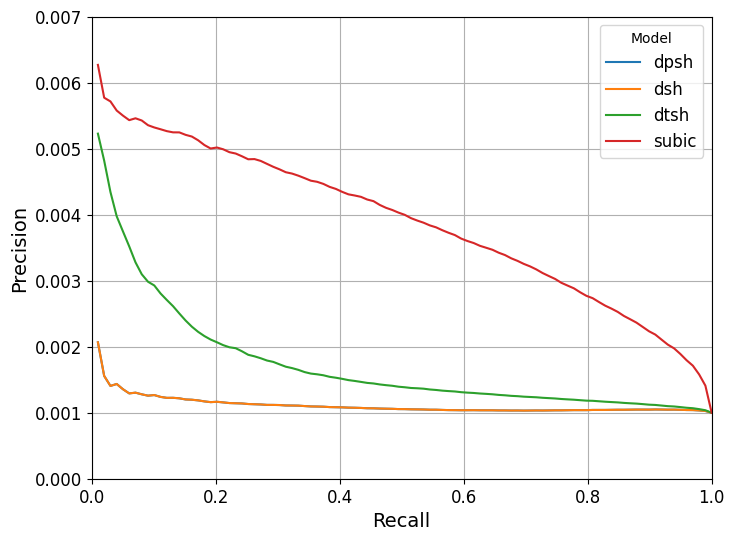

In [6]:
datasets = ["Cifar", "Nus","imagenet"]
for dataset in datasets: 
    plt.figure(figsize=(8, 6))
    for name, df in dataframes.items():
        if dataset == "Cifar" or dataset == "Nus":   
            if dataset in name and 'precision' in df.columns and 'recall' in df.columns:
                plt.plot(df['recall'], df['precision'], label=name.split("_")[0])
                plt.ylim(0,1)
                plt.xlim(0,1)
        else:
            if dataset in name and 'precision' in df.columns and 'recall' in df.columns:
                plt.plot(df['recall'], df['precision'], label=name.split("_")[0])
                plt.ylim(0,0.007)
                plt.xlim(0,1)

    # Customize the plot
    #plt.title(f"Precision-Recall Curves on {dataset} 48 bit", fontsize=14)
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.xticks(fontsize=12)  # x-axis tick font size
    plt.yticks(fontsize=12)  # y-axis tick font size

    plt.legend(title="Model", fontsize=12)
    plt.grid(True)
    plt.savefig(fr"C:\Users\frede\Desktop\pr_curves\pr_curve_{dataset}.png",dpi = 200,bbox_inches='tight')
    plt.show()


In [7]:
dsh_imagenet

,precision,recall
1,0.002067,0.010101
2,0.001557,0.020202
3,0.001406,0.030303
4,0.001436,0.040404
5,0.001356,0.050505
...,...,...
95,0.001041,0.959596
96,0.001040,0.969697
97,0.001035,0.979798
98,0.001026,0.989899


# Pr Curve 2

In [8]:
# Directory containing the CSV files
folder_path = r"C:\Users\frede\Desktop\pr_curves\pr_curves"

dataframes = {}

file_pattern = os.path.join(folder_path, "*dsh_Nus_Wide*")

for filepath in glob.glob(file_pattern):
    filename = os.path.basename(filepath).replace(".csv", "")
    first_two_words = "_".join(filename.split("_")[:4])
    df = pd.read_csv(filepath,index_col=0)
    df = df.iloc[1:]
    dataframes[first_two_words] = df
    globals()[first_two_words] = df

for name, df in dataframes.items():
    print(f"Variable {name} created.")

Variable dsh_Nus_Wide_12 created.
Variable dsh_Nus_Wide_24 created.
Variable dsh_Nus_Wide_32 created.
Variable dsh_Nus_Wide_48 created.


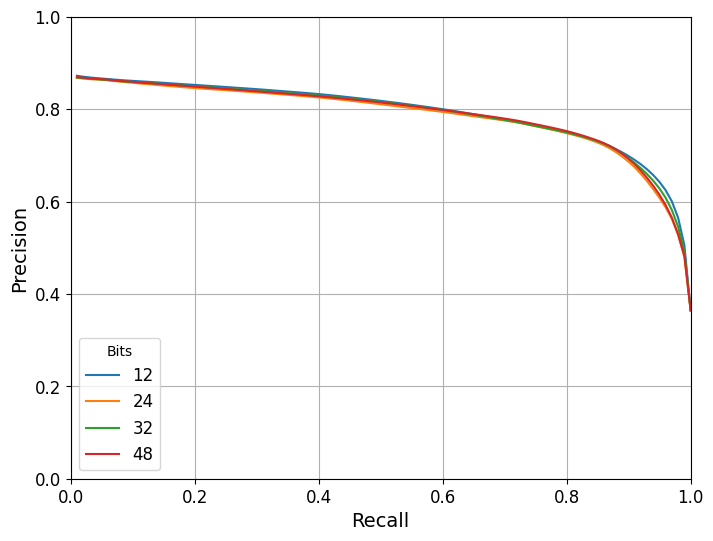

In [9]:

plt.figure(figsize=(8, 6))
for name, df in dataframes.items():
        plt.plot(df['recall'], df['precision'], label=name.split("_")[3])
        plt.ylim(0,1)
        plt.xlim(0,1)

# Customize the plot
#plt.title(f"Precision-Recall Curves on NusWide DSH", fontsize=14)
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Bits", fontsize=12)
plt.grid(True)
plt.savefig(fr"C:\Users\frede\Desktop\pr_curves\pr_curve_dsh_12_24_32.jpg",dpi = 200,bbox_inches='tight')
plt.show()

In [10]:
dpsh_Nus

,precision,recall
1,0.869850,0.010101
2,0.862560,0.020202
3,0.857217,0.030303
4,0.852997,0.040404
5,0.849089,0.050505
...,...,...
95,0.510174,0.959596
96,0.488953,0.969697
97,0.462313,0.979798
98,0.426631,0.989899
